# Video: Visualizing Logistic Regression

Logistic regression is a common way to model binary classification problems.
This problem illustrates logistic regression in comparison to linear regression and shows how it is more appropriate for classification.

## Sample Data


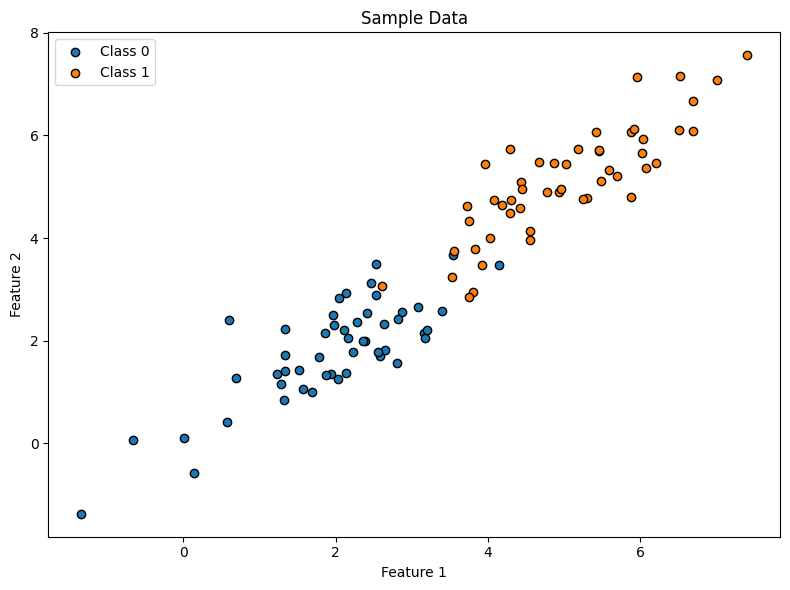

In [ ]:
# https://chatgpt.com/share/689a933b-2868-800c-aaa4-e8312ed897d6

# Reproducible demo: linear vs logistic on almost linearly separable data
# Seed: 704

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

# -----------------------
# 1) Generate the dataset
# -----------------------
np.random.seed(704)

n_samples = 50
mean1 = [2, 2]
mean2 = [5, 5]
cov = [[1, 0.8], [0.8, 1]]  # correlated to make separation imperfect

X1 = np.random.multivariate_normal(mean1, cov, n_samples)
X2 = np.random.multivariate_normal(mean2, cov, n_samples)

X = np.vstack([X1, X2])
y = np.hstack([np.zeros(n_samples), np.ones(n_samples)])

# Mesh for contour plots
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 400),
    np.linspace(y_min, y_max, 400)
)
grid = np.c_[xx.ravel(), yy.ravel()]

plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0], X1[:, 1], label="Class 0", edgecolor="k")
plt.scatter(X2[:, 0], X2[:, 1], label="Class 1", edgecolor="k")
plt.legend()
plt.title("Sample Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

Script:
* Here is a sample data set with two features and two classes.
* The classes are mostly separated, so you could draw a line from the top left to the bottom right corners and mostly get the classifications correct.
* I'm going to run this through linear regression treating the classes as 0-1 target values.

## Linear Regression


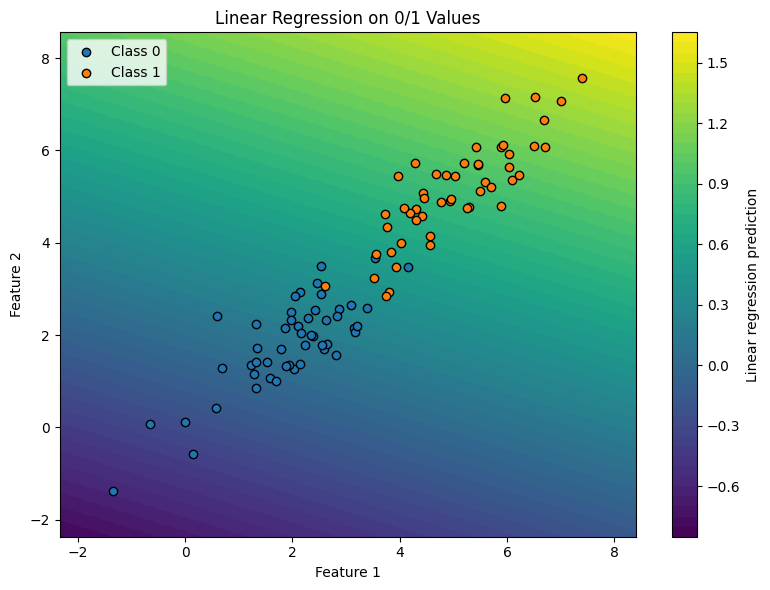

In [ ]:
# ---------------------------------------------
# 2) Linear regression on 0/1 labels (no thresh)
# ---------------------------------------------
lin = LinearRegression().fit(X, y)
Z_lin = lin.predict(grid).reshape(xx.shape)

plt.figure(figsize=(8, 6))
contour_lin = plt.contourf(xx, yy, Z_lin, levels=50)
plt.colorbar(contour_lin, label="Linear regression prediction")
plt.scatter(X1[:, 0], X1[:, 1], label="Class 0", edgecolor="k")
plt.scatter(X2[:, 0], X2[:, 1], label="Class 1", edgecolor="k")
plt.legend()
plt.title("Linear Regression on 0/1 Values")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()


Script:
* The linear regression certainly captures the general trend and says samples in the bottom left are more likely to be class 0 and the samples in the top right are more likely to be class 1.
* But beyond that general trend, it gets a lot of details wrong because of the limits of linear functions.
* It makes predictions greater than one and lower than zero, so we cannot use these predictions as probabilities.
* And if you look at the gradients, it doesn't look like the trend is aligned right.
* Let's look at logistic regression now.

## Logistic Regression


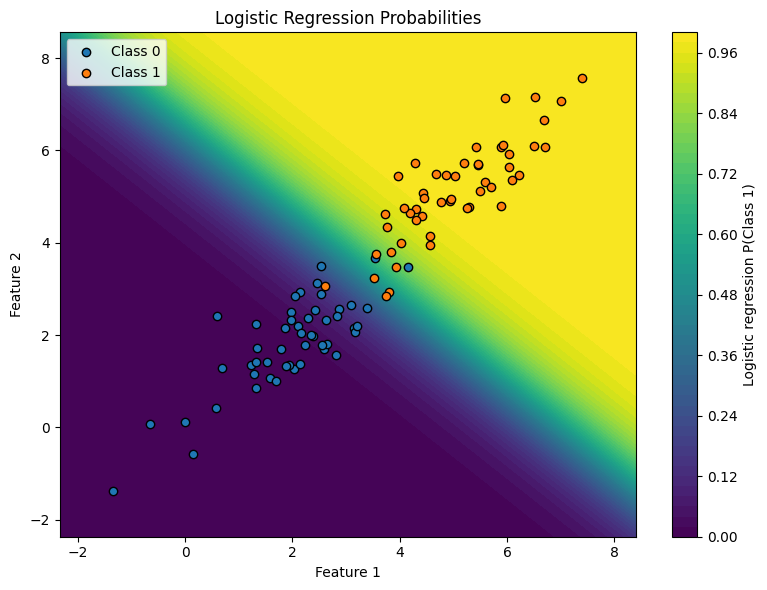

In [ ]:
# ----------------------------
# 3) Logistic regression probs
# ----------------------------
log = LogisticRegression().fit(X, y)
Z_log = log.predict_proba(grid)[:, 1].reshape(xx.shape)

plt.figure(figsize=(8, 6))
contour_log = plt.contourf(xx, yy, Z_log, levels=50)
plt.colorbar(contour_log, label="Logistic regression P(Class 1)")
plt.scatter(X1[:, 0], X1[:, 1], label="Class 0", edgecolor="k")
plt.scatter(X2[:, 0], X2[:, 1], label="Class 1", edgecolor="k")
plt.legend()
plt.title("Logistic Regression Probabilities")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

Script:
* Logistic regression is essentially regression where the functional form is a linear function wrapped up with the logistic function.
* The logistic function forces all the predictions into the range zero to one so we can treat them as probabilities.
* Compared to the linear regression, it is much more confident about which samples belong to which class.
* There is only a small band through the middle where there is uncertainty, and there are samples of different classes in that range.
* Additionally, the boundary is closer to orthogonal compared to the a line through both clusters of samples.
* This classifier looks like it will have much better margins.

Script: (faculty on screen)
* Logistic regression tends to be more expensive to compute than linear regression, but it gives much better outputs for classification.
* However, be careful using it when the data is not close to being linearly separable as it may take a long time to run while not giving a great result.